In [25]:
import pandas as pd

# Estadisticas y correlacion
Utilizaremos un dataset con información acerca de la inversion en publicidad y cuanto se logro vender para determinar correlaciones entre ambas varaibles

In [26]:
data_ads = pd.read_csv("../datasets/ads/Advertising.csv")

In [27]:
data_ads.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [28]:
len(data_ads)

200

Vamos a revisar si la inversion en diferentes medios tiene relación directa con un aumento en las ventas. **Agregaremos una nueva columna con el numero asociado a la correlacion entre las variables**

In [29]:
import numpy as np

![coeficiente correlacion pearson](../Recursos/imgs/correlacion-pearson.png)

In [30]:
data_ads["corrn"] = (data_ads["TV"] - np.mean(data_ads["TV"])) * (data_ads["Sales"] - np.mean(data_ads["Sales"])) #numerador de la funcion

In [31]:
data_ads.head()

,TV,Radio,Newspaper,Sales,corrn
0,230.1,37.8,69.2,22.1,670.896956
1,44.5,39.3,45.1,10.4,371.460206
2,17.2,45.9,69.3,9.3,613.181206
3,151.5,41.3,58.5,18.5,19.958456
4,180.8,10.8,58.4,12.9,-37.892794


In [32]:
data_ads["corr1"] = (data_ads["TV"] - np.mean(data_ads["TV"]))**2

In [33]:
data_ads.head()

,TV,Radio,Newspaper,Sales,corrn,corr1
0,230.1,37.8,69.2,22.1,670.896956,6898.548306
1,44.5,39.3,45.1,10.4,371.460206,10514.964306
2,17.2,45.9,69.3,9.3,613.181206,16859.074806
3,151.5,41.3,58.5,18.5,19.958456,19.869306
4,180.8,10.8,58.4,12.9,-37.892794,1139.568806


In [34]:
data_ads["corr2"] = (data_ads["Sales"] - np.mean(data_ads["Sales"]))**2

In [35]:
data_ads.head()

,TV,Radio,Newspaper,Sales,corrn,corr1,corr2
0,230.1,37.8,69.2,22.1,670.896956,6898.548306,65.246006
1,44.5,39.3,45.1,10.4,371.460206,10514.964306,13.122506
2,17.2,45.9,69.3,9.3,613.181206,16859.074806,22.302006
3,151.5,41.3,58.5,18.5,19.958456,19.869306,20.048006
4,180.8,10.8,58.4,12.9,-37.892794,1139.568806,1.260006


Aun no tenemos el resultado final, solo estamos en el primer paso que nos muestra cuanto se alejan los valores de la media

In [38]:
corrn = sum(data_ads["corrn"])/np.sqrt(sum(data_ads["corr1"]) * sum(data_ads["corr2"]) )

In [39]:
corrn

0.782224424861606

**Correlacion positiva de 0.78**, entre mas se gasta en TV mas aumentan las ventas

Vamos a crear una función que realice toda esta tarea que hicimos anteriormente por trocitos

In [40]:
#df=el dataset var1=variable 1 a relacionar var2= varaible 2 a relacionar
def corr_coeff(df, var1, var2):
    df["corrn"] = (df[var1] - np.mean(df[var1])) * (df[var2] - np.mean(df[var2])) #numerador de la funcion
    df["corr1"] = (df[var1] - np.mean(df[var1]))**2 #primera correlacion
    df["corr2"] = (df[var2] - np.mean(df[var2]))**2
    
    corr_p = sum(df["corrn"])/np.sqrt(sum(df["corr1"]) * sum(df["corr2"]) )
    
    return corr_p

In [41]:
corr_coeff(data_ads,"TV", "Sales")

0.782224424861606

Voy a hacer una copia del dataset original, volviendo a cargar **para relacionar las variables entre cada una de ellas y determinar su correlacion usando la funcion**

In [ ]:
data_adsCO = pd.read_csv("../datasets/ads/Advertising.csv")
cols = data_adsCO.columns.values

In [46]:
cols

array(['TV', 'Radio', 'Newspaper', 'Sales'], dtype=object)

In [47]:
for x in cols:
    for y in cols:
        print(x + "," + y + ": " + str(corr_coeff(data_adsCO,x,y)))

TV,TV: 1.0
TV,Radio: 0.05480866446583009
TV,Newspaper: 0.056647874965056993
TV,Sales: 0.782224424861606
Radio,TV: 0.05480866446583009
Radio,Radio: 1.0
Radio,Newspaper: 0.3541037507611752
Radio,Sales: 0.5762225745710553
Newspaper,TV: 0.056647874965056993
Newspaper,Radio: 0.3541037507611752
Newspaper,Newspaper: 1.0
Newspaper,Sales: 0.22829902637616525
Sales,TV: 0.782224424861606
Sales,Radio: 0.5762225745710553
Sales,Newspaper: 0.22829902637616525
Sales,Sales: 1.0


**Podemos notar que las ventas tienen una alta relacion con TV** y las demas NO, o sea no conviene pagarle publicidad a las otras

Vamos a realizar un grafico de dispersion para ver la relacion entre el gasto en publicidad de TV y su influencia en las ventas

In [48]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Gasto en TV vs Ventas de producto')

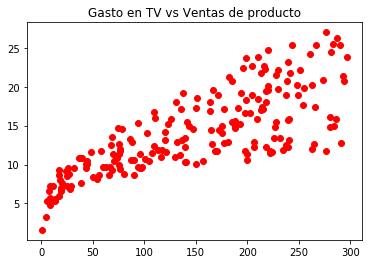

In [49]:
plt.plot(data_adsCO["TV"], data_adsCO["Sales"], "ro")
plt.title("Gasto en TV vs Ventas de producto")

Revisemos ahora el gasto en radio vs las ventas

Text(0.5, 1.0, 'Gasto en Radio vs Ventas de producto')

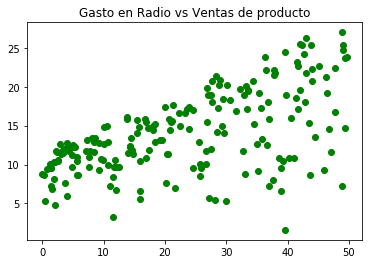

In [55]:
plt.plot(data_adsCO["Radio"], data_adsCO["Sales"], "go")
plt.title("Gasto en Radio vs Ventas de producto")

Los datos estan muy dispersos, no ha relacion directa. Lo mismo pasa con la inversion en periodico

Text(0.5, 1.0, 'Gasto en periodico vs Ventas de producto')

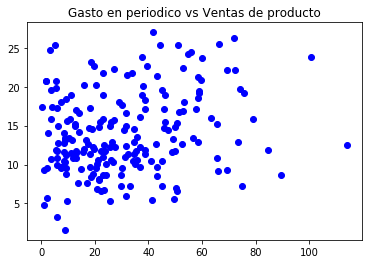

In [56]:
plt.plot(data_adsCO["Newspaper"], data_adsCO["Sales"], "bo")
plt.title("Gasto en periodico vs Ventas de producto")

#### **Podemos hacer todo eso con una funcion**
Gracias a la libreria pandas **podemos pedir la correlacion**

In [60]:
data_ads2 = pd.read_csv("../datasets/ads/Advertising.csv")
data_ads2.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


Tambien podemos pintar la matriz de correlacion

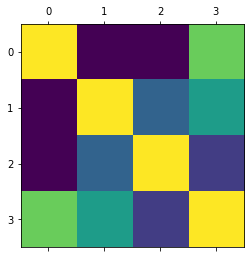

In [61]:
plt.matshow(data_ads2.corr())

**¿Como se entiende?**
Las mas brillantes son las mas correlacionadas.

Siguen el mismo orden de la tabla que acabamos de mostrar

Por ejemplo: 
* 0 - 0 = TV-TV
* 0- 3 = TV-Ventas